# LIC - 2. Regressão Linear com Uma e Múltiplas Variáveis

## Marco Túlio S. M. 
### 20193007156

<h1><center>Uma Variável: Cachorro Quente</center></h1>


### *Interpretação dos Dados*

Text(0, 0.5, 'Ganho')

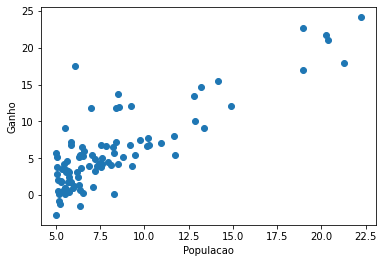

In [22]:
# Util
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def read_df(file_path, columns=""):
	df = pd.read_csv(file_path, sep=",", header=None, names=columns)
	#print(df)
	return df

file_path1 = './data1.txt'
df1 = read_df(file_path1, columns=['Populacao', 'Ganho'])

populacao, ganho = df1["Populacao"].values, df1["Ganho"].values
plt.scatter(populacao, ganho)
plt.xlabel('Populacao')
plt.ylabel('Ganho')

### _Caculo da Melhor Reta através do Gradiente Descendente_

h=-3.0948152578280923x+1.1125679596833007


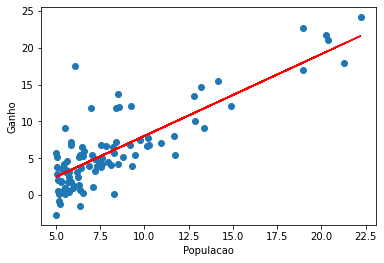

Error: 4.535588477324375


Text(0, 0.5, 'Error Loss')

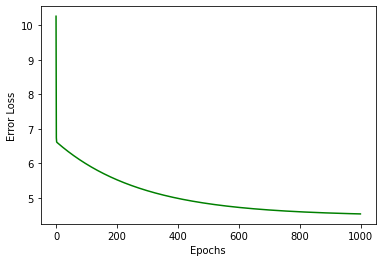

In [23]:
def linear_regression_r1(fitx, fity, alpha, epochs):
    theta_0, theta_1 = 1, 1 # init
    m = len(fitx)

    h_per_epoch = []
    error_loss_per_epoch = []

    for epoch in range(epochs):
        h = theta_0 + theta_1 * fitx # linear and angular coeficients
        diff = h - fity
        theta_0 = theta_0 - alpha * (1 / m) * np.sum(diff)
        theta_1 = theta_1 - alpha * (1 / m) * np.sum(diff * fitx)
        h_per_epoch.append(h)

        # Sum of normalized diffs
        error_loss_per_epoch.append((1 / (2 * m)) * np.sum(np.square(diff)))

    return h_per_epoch, error_loss_per_epoch, theta_0, theta_1

unpack = linear_regression_r1(populacao, ganho, 0.01, 1000)
fit_slope, error_loss_per_epoch = unpack[0][-1], unpack[1]

# Slope Graph
plt.figure(1)
plt.plot(populacao, fit_slope, c="r")
# overllaped with previous plot
plt.scatter(df1["Populacao"].values, df1["Ganho"].values)
plt.xlabel('Populacao')
plt.ylabel('Ganho')
print(f"h={ unpack[2]}x+{ unpack[3]}")
plt.show()

# Error Reduction over iterations
plt.figure(2)
print(f"Error: {error_loss_per_epoch[-1]}")
plt.plot(error_loss_per_epoch, c='g', alpha=1, label='Error')
plt.xlabel('Epochs')
plt.ylabel('Error Loss')

<h1><center>Várias Variáveis: Casas em Porland</center></h1>


### *Interpretação dos Dados*

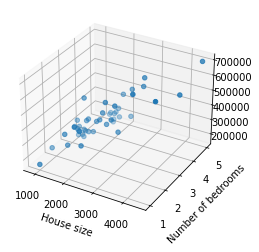

In [24]:
file_path2 = './data2.txt'
df2 = read_df(file_path2, columns=['m^2', 'Qnt. Quartos', 'Preco'])

house_sizes = df2['m^2'].values
nbedrooms = df2['Qnt. Quartos'].values
house_prices = df2['Preco'].values

ax = plt.axes(projection='3d')
ax.scatter3D(house_sizes, nbedrooms, house_prices)
plt.xlabel('House size')
plt.ylabel('Number of bedrooms')
plt.show()

### *Reescalonamento dos Dados*

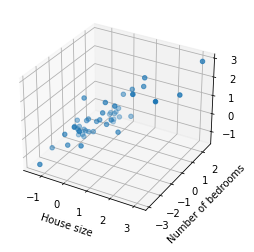

In [25]:
#• Subtraia o valor médio de cada feature do conjunto de dados. 
#• Após subtrair a média, divida os valores das features pelos seus respectivos desvios-padrão 

norm_house_sizes = []
norm_nbedrooms = []
norm_house_prices = []

mean_house_sizes = np.mean(house_sizes)
mean_number_of_bedrooms = np.mean(nbedrooms)
mean_house_prices = np.mean(house_prices)

for i in range(len(house_sizes)):
  norm_house_sizes.append(house_sizes[i] - mean_house_sizes)
  norm_nbedrooms.append(nbedrooms[i] - mean_number_of_bedrooms)
  norm_house_prices.append(house_prices[i] - mean_house_prices)

  std_house_sizes = np.std(house_sizes)
  std_number_of_bedrooms = np.std(nbedrooms)
  std_house_prices = np.std(house_prices)


  norm_house_sizes[i] = norm_house_sizes[i] / std_house_sizes
  norm_nbedrooms[i] = norm_nbedrooms[i] / std_number_of_bedrooms
  norm_house_prices[i] = norm_house_prices[i] / std_house_prices

norm_house_sizes = np.array(norm_house_sizes)
norm_nbedrooms = np.array(norm_nbedrooms)
norm_house_prices = np.array(norm_house_prices)

#print(norm_house_sizes)
#print(norm_nbedrooms)
#print(norm_house_prices)

ax = plt.axes(projection='3d')
ax.scatter3D(norm_house_sizes, norm_nbedrooms, norm_house_prices)
plt.xlabel('House size')
plt.ylabel('Number of bedrooms')
plt.show()

### _Caculo do Melhor Plano através do Gradiente Descendente_

Figure 1
xyz: 4.31712474105796e-05, 0.8790658474276055, -0.04747850571733235


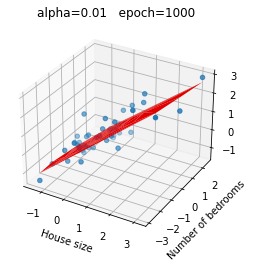

Error: 1.2627184944106375


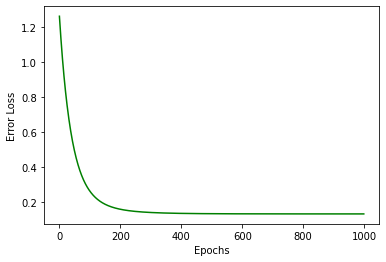

Figure 2
xyz: -8.117046400080129e-17, 0.8847659878549522, -0.05317881966327953


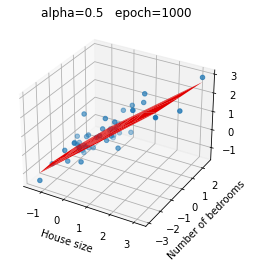

Error: 1.2627184944106375


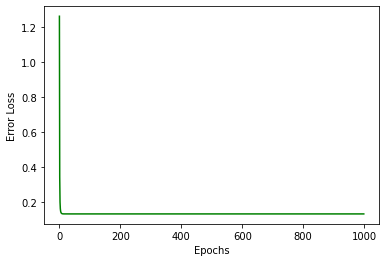

Figure 3
xyz: -8.623859754765227e-17, 0.8847659878549514, -0.05317881966327909


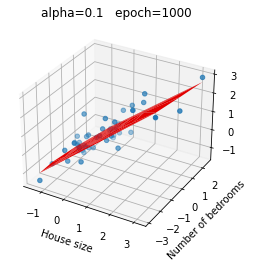

Error: 1.2627184944106375


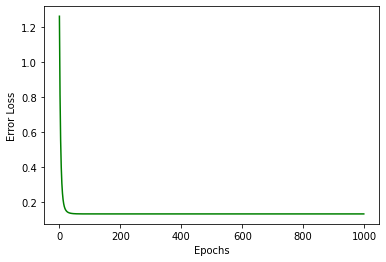

In [26]:
def linear_regression_r2(fitx, fity, fitz, alpha, epochs):
    theta_0, theta_1, theta_2 = 1, 1, 1 # init
    m = len(fitx)
    n = len(fity)

    h_per_epoch = []
    error_loss_per_epoch = []

    for epoch in range(epochs):
        h = theta_0 + theta_1 * fitx + theta_2 * fity # linear and angular coeficients
        diff = h - fitz
        theta_0 = theta_0 - alpha * (1 / m) * np.sum(diff)
        theta_1 = theta_1 - alpha * (1 / m) * np.sum(diff * fitx)
        theta_2 = theta_2 - alpha * (1 / m) * np.sum(diff * fity)

        h_per_epoch.append(h)

        # Sum of normalized diffs
        error_loss_per_epoch.append((1 / (2 * m)) * np.sum(np.square(diff)))

    h_per_epoch.append(theta_0 + theta_1 * fitx + theta_2 * fity) 

    return h_per_epoch, error_loss_per_epoch,  theta_0, theta_1, theta_2

unpack1 = linear_regression_r2(norm_house_sizes, norm_nbedrooms, norm_house_prices, 0.01, 1000)
unpack2 = linear_regression_r2(norm_house_sizes, norm_nbedrooms, norm_house_prices, 0.5, 1000)
unpack3 = linear_regression_r2(norm_house_sizes, norm_nbedrooms, norm_house_prices, 0.1, 1000)
h_per_epoch1 = unpack1[0]
error_loss_per_epoch1 = unpack1[1]
h_per_epoch2 = unpack2[0]
error_loss_per_epoch2 = unpack2[1]
h_per_epoch3 = unpack3[0]
error_loss_per_epoch3 = unpack3[1]

ax = plt.axes(projection='3d')
ax.scatter3D(norm_house_sizes, norm_nbedrooms, norm_house_prices)
ax.plot_trisurf(norm_house_sizes, norm_nbedrooms, h_per_epoch1[-1], color='r')
print(f"Figure 1")
plt.title("alpha=0.01   epoch=1000")
plt.xlabel('House size')
plt.ylabel('Number of bedrooms')
print(f"xyz: {unpack1[2]}, {unpack1[3]}, {unpack1[4]}")
plt.show()

print(f"Error: {error_loss_per_epoch1[0]}")
plt.plot(error_loss_per_epoch1, c='g', alpha=1, label='Error Loss')
plt.xlabel('Epochs')
plt.ylabel('Error Loss')
plt.show()



ax = plt.axes(projection='3d')
ax.scatter3D(norm_house_sizes, norm_nbedrooms, norm_house_prices)
ax.plot_trisurf(norm_house_sizes, norm_nbedrooms, h_per_epoch2[-1], color='r')
print(f"Figure 2")
plt.title("alpha=0.5   epoch=1000")
plt.xlabel('House size')
plt.ylabel('Number of bedrooms')
print(f"xyz: {unpack2[2]}, {unpack2[3]}, {unpack2[4]}")
plt.show()

print(f"Error: {error_loss_per_epoch2[0]}")
plt.plot(error_loss_per_epoch2, c='g', alpha=1, label='Error Loss')
plt.xlabel('Epochs')
plt.ylabel('Error Loss')
plt.show()



ax = plt.axes(projection='3d')
ax.scatter3D(norm_house_sizes, norm_nbedrooms, norm_house_prices)
ax.plot_trisurf(norm_house_sizes, norm_nbedrooms, h_per_epoch3[-1], color='r')
print(f"Figure 3")
plt.title("alpha=0.1   epoch=1000")
plt.xlabel('House size')
plt.ylabel('Number of bedrooms')
print(f"xyz: {unpack3[2]}, {unpack3[3]}, {unpack3[4]}")
plt.show()

print(f"Error: {error_loss_per_epoch3[0]}")
plt.plot(error_loss_per_epoch3, c='g', alpha=1, label='Error Loss')
plt.xlabel('Epochs')
plt.ylabel('Error Loss')
plt.show()



R: O ajuste linear não pode ser representado da mesma forma, pois o resultado é um plano tridimensional, dado que o problema envolve três coordenadas. Além disso, os valores usados na formação desse plano diferem dos valores originais devido à normalização aplicada às features.

<h1><center>Equação Normal</center></h1>


$$ \theta = (X^T X)^{-1} X^T \vec{y}$$

### _Caculo do Melhor Plano através da Equação Normal_

xyz: [89597.9095428], [139.21067402], [-8738.01911233]


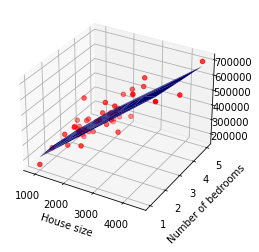

In [27]:
def normal_equation(x, y):
  # @ is the matrix multiplication operator
  # .T is the transpose operator
  # np.linalg.inv is the inverse operator
  return np.linalg.inv(x.T @ x) @ x.T @ y  

x0 = np.ones((len(house_sizes), 1))
x1 = house_sizes.reshape(len(house_sizes), 1)
x2 = nbedrooms.reshape(len(nbedrooms), 1)

x = np.hstack((x0, x1, x2))
y = house_prices.reshape(len(house_prices), 1)

theta = normal_equation(x, y)

h = theta[0] + theta[1] * house_sizes + theta[2] * nbedrooms

ax = plt.axes(projection='3d')
ax.scatter3D(house_sizes, nbedrooms, house_prices, zdir="z" ,c='r', marker='o')
ax.plot_trisurf(house_sizes, nbedrooms, h, color='b')
plt.xlabel('House size')
plt.ylabel('Number of bedrooms')
print(f"xyz: {theta[0]}, {theta[1]}, {theta[2]}")
plt.show()

R: Conforme antecipado, os valores foram obtidos com alta rapidez em comparação ao método de gradiente descendente, uma vez que o método da equação normal não depende de iterações e gera um resultado direto. A normalização das variáveis também produziu diferenças significativas nos valores de cada parâmetro $\theta$ da equação.

regressão -> xyz: [-8.623859754765227e-17], [0.8847659878549514], [-0.05317881966327909]

equação normal -> xyz: [89597.9095428], [139.21067402], [-8738.01911233]
